# Importing Some Needed Python Libraries

In [ ]:
# import pandas and numpy for dataframe and html usage
import pandas as pd
import numpy as np

# import files to write to csvs and mount google drive (if needed)
from google.colab import files

# import matplotlib for plotting
import matplotlib.pyplot as plt

# fastprogress for loop times
# ! pip install fastprogress
from fastprogress import master_bar, progress_bar

# Exploring Data from the 2020 US Census

In [ ]:
census = pd.read_csv('/content/drive/MyDrive/WGU/Term7/D195 - DMDA Capstone/AmazingRace-Datasets/census.csv', index_col=None, encoding='latin-1')
contestants = pd.read_csv('/content/drive/MyDrive/WGU/Term7/D195 - DMDA Capstone/AmazingRace-Datasets/contestants.csv', index_col=None, encoding='latin-1')


In [ ]:
census
# We'll need to clean up those column names and population names

,Population,Percentage of Population
0,"White alone, percent",72.3
1,"Black or African American alone, percent",13.4
2,"American Indian and Alaska Native alone, percent",1.3
3,"Asian alone, percent",3.7
4,Native Hawaiian and Other Pacific Islander alo...,0.2
5,"Two or More Races, percent",2.4
6,"Hispanic or Latino, percent",14.3
7,"White alone, not Hispanic or Latino, percent",60.1


In [ ]:
census.columns = ['Census_Name', 'Census_Percentage']
# We'll update the names of the races to be more in line with our contestants data. 
# This will make for better comparison later. Some of these we won't be using either.
census.at[0,'Census_Name']='W'
census.at[1,'Census_Name']='AFAM'
census.at[2,'Census_Name']='AI'
census.at[3,'Census_Name']='ASAM'
census.at[4,'Census_Name']='NHP'
census.at[5,'Census_Name']='IR'
census.at[6,'Census_Name']='HIAM'
census.at[7,'Census_Name']='WNH'
census

,Census_Name,Census_Percentage
0,W,72.3
1,AFAM,13.4
2,AI,1.3
3,ASAM,3.7
4,NHP,0.2
5,IR,2.4
6,HIAM,14.3
7,WNH,60.1


In [ ]:
# The W and WA categories are very similar. In this instance I will combine both and then take the average to reduce a category.
# We will also remove AI and NHP since we don't have that category from the Amazing Race datasets.
census = census.drop([2, 4])
census

,Census_Name,Census_Percentage
0,W,72.3
1,AFAM,13.4
3,ASAM,3.7
5,IR,2.4
6,HIAM,14.3
7,WNH,60.1


In [ ]:
census.at[0, 'Census_Percentage'] = (census.loc[0]['Census_Percentage'] + census.loc[7]['Census_Percentage']) / 2
census

,Census_Name,Census_Percentage
0,W,66.2
1,AFAM,13.4
3,ASAM,3.7
5,IR,2.4
6,HIAM,14.3
7,WNH,60.1


In [ ]:
# Now to drop WNH since it's redudant
census = census.drop([7])

In [ ]:
# reindex the dataframe
census = census.sort_values('Census_Name')
census = census.reset_index(drop = True)
census

,Census_Name,Census_Percentage
0,AFAM,13.4
1,ASAM,3.7
2,HIAM,14.3
3,IR,2.4
4,W,66.2


# Exploring Contestant Data from The Amazing Race

In [ ]:
# A look into the contestants dataset
contestants.head()

,Key,Season,Team #,Name,Age,Gender,Race/Ethnicity,Occupation,Hometown
0,S01T01,1,1,"Robert ""Rob"" Frisbee",27,M,W,Lawyer,"Minneapolis, Minnesota"
1,S01T01,1,1,Brennan Swain,29,M,W,Lawyer,"Rochester, New York"
2,S01T02,1,2,Frank Mesa,30,M,AFAM,Separated,"Queens, New York"
3,S01T02,1,2,Margarita Mesa,28,F,AFAM,Separated,"Queens, New York"
4,S01T03,1,3,"Joseph ""Joe"" Baldassare",50,M,W,Life Partners,"Laguna Niguel, California"


## Diversity Breakdown

In [ ]:
# Creating a new dataframe for only the race/ethnicity in The Amazing Race data
# This will help answer one of our research questions:
# Does race/ethnicity from past contestants reflect the same percentages as
# the US Population in 2020?
tar_breakdown = contestants['Race/Ethnicity'].value_counts().rename_axis('TAR_Name').reset_index(name='TAR_Counts')
tar_breakdown['TAR_Percentage'] = tar_breakdown['TAR_Counts'].div(tar_breakdown['TAR_Counts'].sum(axis=0), axis=0).multiply(100)
tar_breakdown['TAR_Percentage'] = tar_breakdown['TAR_Percentage'].round(1)
tar_breakdown


,TAR_Name,TAR_Counts,TAR_Percentage
0,W,562,77.0
1,AFAM,72,9.9
2,IR,48,6.6
3,ASAM,36,4.9
4,HIAM,12,1.6


In [ ]:
# We won't be needing the counts column anymore
tar_breakdown = tar_breakdown.drop(['TAR_Counts'], axis=1)
tar_breakdown

,TAR_Name,TAR_Percentage
0,W,77.0
1,AFAM,9.9
2,IR,6.6
3,ASAM,4.9
4,HIAM,1.6


In [ ]:
tar_breakdown = tar_breakdown.sort_values('TAR_Name')
tar_breakdown = tar_breakdown.reset_index(drop = True)
tar_breakdown

,TAR_Name,TAR_Percentage
0,AFAM,9.9
1,ASAM,4.9
2,HIAM,1.6
3,IR,6.6
4,W,77.0


### How does the diversity from the Amazing Race reflect the diversity of the United States?

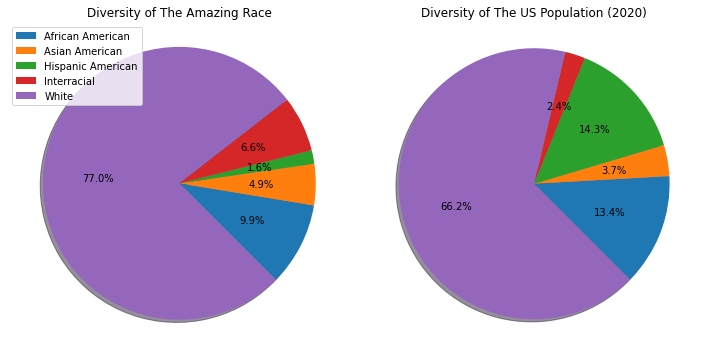

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

values = tar_breakdown['TAR_Percentage']
ax1.pie(values, shadow=True, autopct = '%1.1f%%', startangle=-45, center = (-2,0)) 
ax1.title.set_text('Diversity of The Amazing Race')
ax1.legend(['African American', 'Asian American', 'Hispanic American', 'Interracial', 'White'], loc='upper left')

values2 = census['Census_Percentage']
ax2.pie(values2, shadow=True, autopct = '%1.1f%%', startangle=-45)
ax2.title.set_text('Diversity of The US Population (2020)')

ax1.axis('equal')
ax2.axis('equal')
plt.tight_layout()
plt.show();

Now that we have all of the census and Amazing Race race/ethnicity data together, we can answer one of our hypotheses. Does The Amazing Race's diversity breakdown match or come close to the represenation of The United States?

In [ ]:
# For a clear table view we can concatenate both dataframes into one
diversity_comparison = pd.concat([tar_breakdown, census], axis=1)
# Dropping the Census Name column
diversity_comparison = diversity_comparison.drop('Census_Name', axis=1)
# Renaming columns
diversity_comparison.columns = ['Name', 'TAR_Percentage', 'Census_Percentage']

# Let's add a new column to show the differences in percentages between both the census and The Amazing race
diversity_comparison['Difference'] = diversity_comparison['TAR_Percentage'] - diversity_comparison['Census_Percentage']
diversity_comparison

,Name,TAR_Percentage,Census_Percentage,Difference
0,AFAM,9.9,13.4,-3.5
1,ASAM,4.9,3.7,1.2
2,HIAM,1.6,14.3,-12.7
3,IR,6.6,2.4,4.2
4,W,77.0,66.2,10.8


We discovered a three groups were overrepresented during the history of the show. White Americans being represented with the biggest positive with 10.8%. Asian Americans are represented at 1.2% over the census data. Those Americans that identify as interracial came really close to even with a 4.2% difference. The two remaining races were African Americans who were underrepresented by 3.5% and Hispanic Americans with the biggest gap in difference at 12.7% underrepresentation.

## Age Breakdown

In [ ]:
# A breakdown of the contestants ages, with a minimum of 8 and a maximum of 71.
contestants['Age'].describe()

count    730.000000
mean      33.090411
std       10.622080
min        8.000000
25%       26.000000
50%       30.000000
75%       39.000000
max       71.000000
Name: Age, dtype: float64

In [ ]:
above30 = contestants[contestants.Age >= 30]
above30 = above30[['Name', 'Age']]
above30 = above30.sort_values(['Age'])
above30.describe().round()

,Age
count,387.0
mean,40.0
std,10.0
min,30.0
25%,32.0
50%,38.0
75%,46.0
max,71.0


In [ ]:
under30 = contestants[contestants.Age < 30]
under30 = under30[['Name', 'Age']]
under30 = under30.sort_values(['Age'])
under30.describe().round()

,Age
count,343.0
mean,25.0
std,3.0
min,8.0
25%,23.0
50%,26.0
75%,27.0
max,29.0


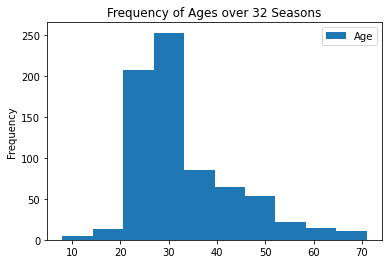

In [ ]:
tar_ages = contestants[['Age', 'Season']]
age_grp = tar_ages.groupby('Age').count()
tar_ages.plot(y = 'Age', kind='hist', title='Frequency of Ages over 32 Seasons');

## Hometowns

In [ ]:
hometown = contestants[['Hometown']]
citystate = hometown['Hometown'].str.split(',', expand=True)
citystate.columns = ['city', 'state']

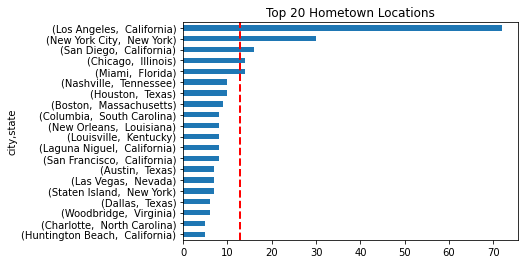

In [ ]:
# Los Angeles, CA being the most popular hometown for contestants.
# Makes sense since the show is probably based out of LA.
top_cities = citystate.value_counts().head(20).sort_values(ascending=True)
top_cities.plot.barh();
plt.axvline(top_cities.mean(), color='red', linestyle='dashed', linewidth=2);
plt.title('Top 20 Hometown Locations');

In [ ]:
losangelinos = contestants[contestants.Hometown == 'Los Angeles, California']
losangelinos = losangelinos.drop('Team #', axis=1)
losangelinos.head()

,Key,Season,Name,Age,Gender,Race/Ethnicity,Occupation,Hometown
12,S01T07,1,Paul J. Alessi,32,M,W,Actor,"Los Angeles, California"
13,S01T07,1,Amie Barsky,27,M,W,Bartender,"Los Angeles, California"
24,S02T02,2,Tara Lynch,31,F,W,Furniture Designer,"Los Angeles, California"
25,S02T02,2,"William ""Wil"" Steger",37,F,W,Furniture Designer,"Los Angeles, California"
50,S03T04,3,Derek Riker,32,M,W,Model,"Los Angeles, California"


In [ ]:
# Looks like white women, aged around 30, who are models are the most frequent contestants hailing from Los Angeles.
# And Justin Kanew who appeared on the show twice and claims his hometown as LA.
losangelinos.describe(include='all')

,Key,Season,Name,Age,Gender,Race/Ethnicity,Occupation,Hometown
count,72,72.000000,72,72.000000,72,72,72,72
unique,45,NaN,69,NaN,2,5,43,1
top,S01T07,NaN,Justin Kanew,NaN,F,W,Model,"Los Angeles, California"
freq,2,NaN,2,NaN,37,49,6,72
mean,NaN,15.694444,NaN,29.986111,NaN,NaN,NaN,NaN
std,NaN,9.351717,NaN,6.003504,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,21.000000,NaN,NaN,NaN,NaN
25%,NaN,6.000000,NaN,25.000000,NaN,NaN,NaN,NaN
50%,NaN,16.000000,NaN,29.000000,NaN,NaN,NaN,NaN
75%,NaN,24.000000,NaN,32.000000,NaN,NaN,NaN,NaN


## Season Winners Breakdown

In [ ]:
# Now that we know our top finishers from our results dataset, we can begin to breakdown factors that might make winners on the show
# We'll make a copy of our contestants dataframe so we can break it down more with only the top winning teams
winners = contestants.copy()
winners.head()

,Key,Season,Team #,Name,Age,Gender,Race/Ethnicity,Occupation,Hometown
0,S01T01,1,1,"Robert ""Rob"" Frisbee",27,M,W,Lawyer,"Minneapolis, Minnesota"
1,S01T01,1,1,Brennan Swain,29,M,W,Lawyer,"Rochester, New York"
2,S01T02,1,2,Frank Mesa,30,M,AFAM,Separated,"Queens, New York"
3,S01T02,1,2,Margarita Mesa,28,F,AFAM,Separated,"Queens, New York"
4,S01T03,1,3,"Joseph ""Joe"" Baldassare",50,M,W,Life Partners,"Laguna Niguel, California"


In [ ]:
# One change I would like to make is to change the Team # column to the Finish column.
# The teams are arranged in the place they finished so this might be an easier way
# to illustrate which place they finished in overall, while also allowing me to 
# filter out the seasons winners into another dataframe. I will also change Race Ethnicity to Race for
# display purposes
winners.columns = ['Key', 'Season', 'Finish', 'Name', 'Age', 'Gender', 'Race', 'Occupation', 'Hometown']

In [ ]:
# A new dataset to display the top 3 finishers for each season.
season_winners = winners.loc[winners['Finish'] == 1]
season_winners = season_winners.append(winners.loc[winners['Finish'] == 2])
season_winners = season_winners.append(winners.loc[winners['Finish'] == 3])
season_winners.head()

,Key,Season,Finish,Name,Age,Gender,Race,Occupation,Hometown
0,S01T01,1,1,"Robert ""Rob"" Frisbee",27,M,W,Lawyer,"Minneapolis, Minnesota"
1,S01T01,1,1,Brennan Swain,29,M,W,Lawyer,"Rochester, New York"
22,S02T01,2,1,Alex Boylan,24,M,W,Bartender,"Boston, Massachusetts"
23,S02T01,2,1,"Christopher ""Chris"" Luca",25,M,W,Sales Representative,"Boston, Massachusetts"
44,S03T01,3,1,"Zachary ""Zach"" Behr",23,M,W,Productions Assistant,"New York City, New York"


In [ ]:
print('The oldest winner on The Amazing Race is ' + str(season_winners['Age'].max()) + ' years old.')
print('The youngest winner on The Amazing Race is ' + str(season_winners['Age'].min()) + ' years old.')

The oldest winner on The Amazing Race is 68 years old.
The youngest winner on The Amazing Race is 14 years old.


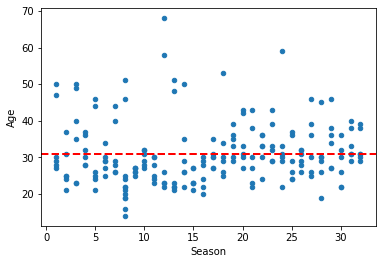

In [ ]:
# A scatter plot to show ages over the seasons with the mean being about 30
# A couple of outliers with an age of 68 and an age of 14.
season_winners.plot.scatter(x='Season', y='Age');
plt.axhline(season_winners['Age'].mean(), color='red', linestyle='dashed', linewidth=2);

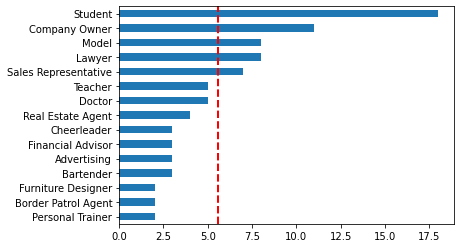

In [ ]:
# Student is the most frequent occupation for winners. Makese since in that
# they would have the time and flexibility to attend a several month long
# reality tv show.
job_count = season_winners['Occupation'].value_counts().head(15).sort_values(ascending=True)
job_count.plot.barh();
plt.axvline(job_count.mean(), color='red', linestyle='dashed', linewidth=2);

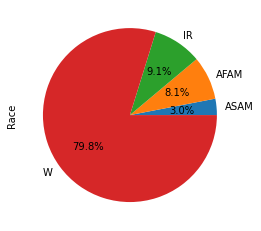

In [ ]:
# Very similar to our previous racial breakdowns but even more skewed towards White
# when it comes to actually finishing in the top 3.
race_breakdown = season_winners['Race'].value_counts().sort_values(ascending=True)
race_breakdown.plot.pie(autopct = '%1.1f%%');

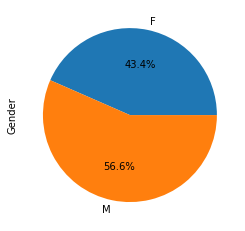

In [ ]:
# Not a big suprise as there are more male contestants on the show
# but more evenly matched than I anticipated.
gender_breakdown = season_winners['Gender'].value_counts().sort_values(ascending=True)
gender_breakdown.plot.pie(autopct = '%1.1f%%');

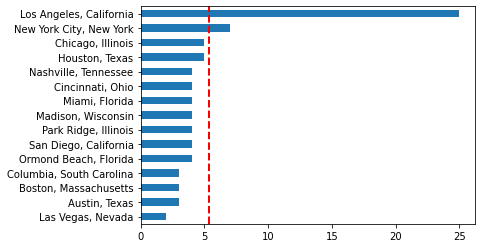

In [ ]:
hometown_breakdown = season_winners['Hometown'].value_counts().head(15).sort_values(ascending=True)
hometown_breakdown.plot.barh();
plt.axvline(hometown_breakdown.mean(), color='red', linestyle='dashed', linewidth=2);

In [ ]:
# 198 winners, with Christie Woods being in the top 3 twice for 2 separate seasons.
# 18 winners are students and Los Angeles has 25 winners.
season_winners.describe(include='all')

,Key,Season,Finish,Name,Age,Gender,Race,Occupation,Hometown
count,198,198.000000,198.000000,198,198.000000,198,198,198,198
unique,96,NaN,NaN,192,NaN,2,4,98,100
top,S08T03,NaN,NaN,Christie Woods,NaN,M,W,Student,"Los Angeles, California"
freq,4,NaN,NaN,2,NaN,112,158,18,25
mean,NaN,16.242424,2.000000,NaN,30.838384,NaN,NaN,NaN,NaN
std,NaN,9.231474,0.818566,NaN,8.398945,NaN,NaN,NaN,NaN
min,NaN,1.000000,1.000000,NaN,14.000000,NaN,NaN,NaN,NaN
25%,NaN,8.000000,1.000000,NaN,25.250000,NaN,NaN,NaN,NaN
50%,NaN,16.000000,2.000000,NaN,29.000000,NaN,NaN,NaN,NaN
75%,NaN,24.000000,3.000000,NaN,34.000000,NaN,NaN,NaN,NaN


In [ ]:
# 158 winners are white. So diversity is seriously lacking when it comes to 
# actually winning the race.
season_winners.loc[season_winners['Race'] == 'W'].describe(include='all')

,Key,Season,Finish,Name,Age,Gender,Race,Occupation,Hometown
count,158,158.000000,158.000000,158,158.000000,158,158,158,158
unique,76,NaN,NaN,154,NaN,2,1,87,87
top,S08T03,NaN,NaN,Eric Sanchez,NaN,M,W,Student,"Los Angeles, California"
freq,4,NaN,NaN,2,NaN,92,158,17,17
mean,NaN,15.822785,2.000000,NaN,30.462025,NaN,NaN,NaN,NaN
std,NaN,9.308252,0.813892,NaN,8.890441,NaN,NaN,NaN,NaN
min,NaN,1.000000,1.000000,NaN,14.000000,NaN,NaN,NaN,NaN
25%,NaN,8.000000,1.000000,NaN,25.000000,NaN,NaN,NaN,NaN
50%,NaN,15.000000,2.000000,NaN,29.000000,NaN,NaN,NaN,NaN
75%,NaN,24.000000,3.000000,NaN,33.000000,NaN,NaN,NaN,NaN


In [ ]:
# Most winners (139 of them) are aged 32 or less.
season_winners.loc[season_winners['Age'] <= 32].describe(include='all')

,Key,Season,Finish,Name,Age,Gender,Race,Occupation,Hometown
count,139,139.000000,139.000000,139,139.000000,139,139,139,139
unique,77,NaN,NaN,137,NaN,2,4,70,77
top,S08T01,NaN,NaN,Eric Sanchez,NaN,M,W,Student,"Los Angeles, California"
freq,4,NaN,NaN,2,NaN,73,114,17,20
mean,NaN,15.611511,2.000000,NaN,26.503597,NaN,NaN,NaN,NaN
std,NaN,9.004436,0.825324,NaN,3.675958,NaN,NaN,NaN,NaN
min,NaN,1.000000,1.000000,NaN,14.000000,NaN,NaN,NaN,NaN
25%,NaN,8.000000,1.000000,NaN,24.000000,NaN,NaN,NaN,NaN
50%,NaN,15.000000,2.000000,NaN,27.000000,NaN,NaN,NaN,NaN
75%,NaN,24.000000,3.000000,NaN,30.000000,NaN,NaN,NaN,NaN


In [ ]:
# Over half of the top finishers are men.
season_winners.loc[season_winners['Gender'] == 'M'].describe(include='all')

,Key,Season,Finish,Name,Age,Gender,Race,Occupation,Hometown
count,112,112.000000,112.000000,112,112.000000,112,112,112,112
unique,84,NaN,NaN,108,NaN,1,4,60,73
top,S08T01,NaN,NaN,Korey Kuhl,NaN,M,W,Student,"Los Angeles, California"
freq,3,NaN,NaN,2,NaN,112,92,11,15
mean,NaN,16.071429,1.928571,NaN,31.696429,NaN,NaN,NaN,NaN
std,NaN,9.531091,0.824340,NaN,9.279289,NaN,NaN,NaN,NaN
min,NaN,1.000000,1.000000,NaN,14.000000,NaN,NaN,NaN,NaN
25%,NaN,8.000000,1.000000,NaN,25.750000,NaN,NaN,NaN,NaN
50%,NaN,16.000000,2.000000,NaN,30.000000,NaN,NaN,NaN,NaN
75%,NaN,24.000000,3.000000,NaN,35.250000,NaN,NaN,NaN,NaN


In [ ]:
# When we section out only the 1st place finishers we see most are from LA again,
# most are white men and company owner's have 6 wins.
season_winners.loc[season_winners['Finish'] == 1].describe(include='all')

,Key,Season,Finish,Name,Age,Gender,Race,Occupation,Hometown
count,66,66.000000,66.0,66,66.000000,66,66,66,66
unique,32,NaN,NaN,66,NaN,2,4,41,34
top,S08T01,NaN,NaN,"Robert ""Rob"" Frisbee",NaN,M,W,Company Owner,"Los Angeles, California"
freq,4,NaN,NaN,1,NaN,42,52,6,10
mean,NaN,16.242424,1.0,NaN,29.621212,NaN,NaN,NaN,NaN
std,NaN,9.278695,0.0,NaN,7.305983,NaN,NaN,NaN,NaN
min,NaN,1.000000,1.0,NaN,19.000000,NaN,NaN,NaN,NaN
25%,NaN,8.000000,1.0,NaN,24.000000,NaN,NaN,NaN,NaN
50%,NaN,16.000000,1.0,NaN,29.000000,NaN,NaN,NaN,NaN
75%,NaN,24.000000,1.0,NaN,33.000000,NaN,NaN,NaN,NaN


### Are winners too repetitive?

In [ ]:
repetitive_winners =  season_winners[
# not including season 8 since each team consists of 4 members which skews
# the results

    (season_winners['Season'] != 8) &
    (season_winners['Gender'] == 'M') &
    (season_winners['Age'] <= 31) &
    (season_winners['Race'] == 'W') &
    (season_winners['Finish'] == 1)]

repetitive_winners

,Key,Season,Finish,Name,Age,Gender,Race,Occupation,Hometown
0,S01T01,1,1,"Robert ""Rob"" Frisbee",27,M,W,Lawyer,"Minneapolis, Minnesota"
1,S01T01,1,1,Brennan Swain,29,M,W,Lawyer,"Rochester, New York"
22,S02T01,2,1,Alex Boylan,24,M,W,Bartender,"Boston, Massachusetts"
23,S02T01,2,1,"Christopher ""Chris"" Luca",25,M,W,Sales Representative,"Boston, Massachusetts"
44,S03T01,3,1,"Zachary ""Zach"" Behr",23,M,W,Productions Assistant,"New York City, New York"
69,S04T01,4,1,Reichen Lehmkuhl,28,M,W,Pilot,"Los Angeles, California"
198,S09T01,9,1,Tyler MacNiven,25,M,W,Cinematopgrapher,"San Francisco, California"
199,S09T01,9,1,"Brian Jeffrey ""B. J."" Averell",26,M,W,Teacher,"Los Angeles, California"
220,S10T01,10,1,Tyler Denk,29,M,W,Model,"Los Angeles, California"
221,S10T01,10,1,James Branaman,27,M,W,Model,"Los Angeles, California"


We found the biggest grouping of first place finishers from the past 32 seasons of The Amazing Race. If I had to guess what the winners of the next season would, these factors would be it.

---

*The key factors were:*

*   Gender: **Male**
*   Race: **White**
*   Age: **31 or Less**
*   Hometown: **California**







## Ratings Breakdown

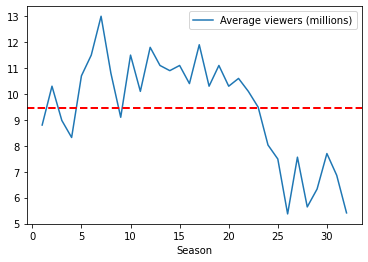

In [ ]:
# Let's look at some ratings data
# The ratings dropped around season 22 and have never recovered
ratings = pd.read_csv('/content/drive/MyDrive/WGU/Term7/D195 - DMDA Capstone/AmazingRace-Datasets/ratings.csv', index_col=None, encoding='latin-1')
ratings.plot.line(y='Average viewers (millions)', x='Season');
plt.axhline(ratings['Average viewers (millions)'].mean(), color='red', linestyle='dashed', linewidth=2);

## Most Viewed Seasons and Why

In [ ]:
# Which season had the most people watching?
highest_ratings = ratings['Average viewers (millions)'].max()
mostwatched = str(int(ratings['Season'].loc[ratings['Average viewers (millions)'] == highest_ratings]))
print('Season ' + mostwatched + ' had the highest average viewers with approximately ' + str(int((ratings['Average viewers (millions)'].max()))) + ' million people watching The Amazing Race.')

Season 7 had the highest average viewers with approximately 13 million people watching The Amazing Race.


In [ ]:
# What was so special about season 7?
season_winners.loc[season_winners['Season'] == 7]

,Key,Season,Finish,Name,Age,Gender,Race,Occupation,Hometown
136,S07T01,7,1,Uchenna Agu,40,M,AFAM,Energy Broker,"Houston, Texas"
137,S07T01,7,1,Joyce Agu,44,F,AFAM,Sales Manager,"Houston, Texas"
138,S07T02,7,2,Amber Brkich,26,F,W,Administrative Assistant,"Beaver, Pennsylvania"
139,S07T02,7,2,Rob Mariano,29,M,W,Construction,"Canton, Massachusetts"
140,S07T03,7,3,Kelly McCorkle,26,F,W,Pageant Queen,"Greenville, South Carolina"
141,S07T03,7,3,"Ronald ""Ron"" Young, Jr.",28,M,W,Student,"Villa Rica, Georgia"


It seems that Season 7 established the **first ever African American** winners on the show. They were also a **male and female** which was a unique factor for season winners and also **well above the median age of 31**. The 2nd and 3rd place teams were also unique in that there were co-ed teams of a man and woman.

These are all quite the alternative team winners to our overall findings when it comes to winners of the show. Could ratings be positiviely affected when we break away from our 'normal' winners? Let's look at another highly viewed season to see if there any insights to be discovered.

In [ ]:
# Here are the top 2 viewed seasons - 7 and 17
ratings[['Season', 'Average viewers (millions)']].sort_values(by='Average viewers (millions)', ascending=False).head(2)

,Season,Average viewers (millions)
6,7,13.0
16,17,11.9


In [ ]:
season_winners.loc[season_winners['Season'] == 17]

,Key,Season,Finish,Name,Age,Gender,Race,Occupation,Hometown
378,S17T01,17,1,"Natalie ""Nat"" Strand",31,F,IR,Doctor,"Newport Beach, California"
379,S17T01,17,1,"Katherine ""Kat"" Chang",35,F,IR,Doctor,"Santa Monica, California"
380,S17T02,17,2,Brook Roberts,27,F,W,Television Hosts,"San Diego, California"
381,S17T02,17,2,Claire Champlin,30,F,W,Television Hosts,"Reno, Nevada"
382,S17T03,17,3,"Jillian ""Jill"" Haney",27,F,W,Hair Stylist,"Marina Del Rey, California"
383,S17T03,17,3,Thomas Wolfard,30,M,W,Sales Representative,"Marina Del Rey, California"


In Season 17, the winners were unique because of a few differentiating factors: they were an 'interracial' team consisting of two different races, they were both women and one of them was above the average age of 31.

There does seem to be some truth that as the winners diversify from the norm, the ratings for the show are rewarded.

## The Least Viewed Season

In [ ]:
# What about the least watched season?
# Any factors that contributed to that?
lowest_rating = ratings['Average viewers (millions)'].min()
lowestwatched = str(int(ratings['Season'].loc[ratings['Average viewers (millions)'] == lowest_rating]))
print('Season ' + lowestwatched + ' had the lowest average viewers with approximately ' + str(lowest_rating) + ' million people watching The Amazing Race.')

Season 26 had the lowest average viewers with approximately 5.37 million people watching The Amazing Race.


In [ ]:
# Not seeing anything that sets this season apart with the contestants factors.
contestants.loc[contestants['Season'] == 26]

,Key,Season,Team #,Name,Age,Gender,Race/Ethnicity,Occupation,Hometown
576,S26T01,26,1,Laura Pierson,29,F,W,Company Owner,"Los Angeles, California"
577,S26T01,26,1,Tyler Adams,26,M,W,Talent Broker,"Santa Monica, California"
578,S26T02,26,2,Jelani Roy,32,M,IR,Lawyer,"New York City, New York"
579,S26T02,26,2,Jenny Wu,32,F,IR,Lawyer,"Los Angeles, California"
580,S26T03,26,3,Blair Townsend,31,M,W,Doctor,"Amelia Island, Florida"
581,S26T03,26,3,Hayley Keel,28,F,W,Nurse,"Saint Petersburg, Florida"
582,S26T04,26,4,"Michael ""Mike"" Dombrowski",26,M,W,Pro Wrestler,"Traverse City, Michigan"
583,S26T04,26,4,Rochelle Nevedal,29,F,W,Roller Derby,"Kalkaska, Michigan"
584,S26T05,26,5,"Matthew ""Matt"" Cucolo",30,M,W,Hair Stylist,"Scarsdale, New York"
585,S26T05,26,5,Ashley Gordon,28,F,W,Hair Stylist,"Scarsdale, New York"


In [ ]:
# We need to see if there is another piece of data that shows why the season didn't do well with viewers
# Let's look at the relationships column from our results dataset.
results = pd.read_csv('/content/drive/MyDrive/WGU/Term7/D195 - DMDA Capstone/AmazingRace-Datasets/results.csv', encoding='latin-1')
results.head()

,ID,Team Name,Relationship,Season,Blood Relation,# of Teams,Leg 1,Leg 2,Leg 3,Leg 4,Leg 5,Leg 6,Leg 7,Leg 8,Leg 9,Leg 10,Leg 11,Leg 12,Leg 13
0,0,Rob & Brennan,Lawyers/Best Friends,1,N,11,1,3.0,3.0,6.0,4.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0
1,1,Frank & Margarita,Separated Parents,1,N,11,3,4.0,2.0,5.0,5.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0
2,2,Joe & Bill,Life Partners,1,N,11,2,2.0,4.0,1.0,2.0,2.0,2.0,4.0,4.0,4.0,3.0,3.0,3.0
3,3,Kevin & Drew,Fraternity Brothers,1,N,11,9,5.0,1.0,2.0,1.0,4.0,4.0,1.0,3.0,3.0,4.0,NaN,NaN
4,4,Nancy & Emily,Mother/Daughter,1,Y,11,10,7.0,8.0,3.0,3.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN


In [ ]:
# This is the season that contained all contestants that were dating.
# Apparently the audience wasn't receptive to these team types.
results.loc[results['Season'] == 26]

,ID,Team Name,Relationship,Season,Blood Relation,# of Teams,Leg 1,Leg 2,Leg 3,Leg 4,Leg 5,Leg 6,Leg 7,Leg 8,Leg 9,Leg 10,Leg 11,Leg 12,Leg 13
278,278,Laura & Tyler,Blind Dating,26,N,11,3,2.0,4.0,4.0,6.0,6.0,2.0,1.0,1.0,4.0,3.0,1.0,NaN
279,279,Jelani & Jenny,Blind Dating,26,N,11,1,1.0,3.0,7.0,4.0,5.0,4.0,4.0,3.0,2.0,2.0,2.0,NaN
280,280,Hayley & Blair,Blind Dating,26,N,11,8,9.0,2.0,2.0,5.0,1.0,3.0,3.0,2.0,1.0,1.0,3.0,NaN
281,281,Mike & Rochelle,Dating for 8 Months,26,N,11,7,8.0,1.0,6.0,7.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,NaN
282,282,Matt & Ashley,Dating for 3 Years Engaged,26,N,11,9,7.0,6.0,8.0,2.0,4.0,1.0,2.0,5.0,5.0,NaN,NaN,NaN
283,283,Aly & Steve,Dating for 7 Months,26,N,11,4,3.0,5.0,3.0,1.0,2.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN
284,284,Jeff & Jackie,Blind Dating,26,N,11,2,6.0,8.0,5.0,3.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,285,Bergen & Kurt,Blind Dating,26,N,11,6,5.0,7.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,286,Harley & Jonathan,Dating for 7 Years,26,N,11,5,4.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,287,Libby & CJ,Dating for 10 Years,26,N,11,10,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Discoveries

What we discovered after exploring data from 32 seasons of The Amazing Race

If you want to win the show, your best odds are being:
*  a white male
*  31 years old or younger
*  No blood relation to your teammate

Occupation and hometown do not have as big of an impact as I suspected.

Race does have an impact on the show's ratings but I would need to mine each season in order to fully determine that outcome. It does seem to correlate some with the first African American team bringing in the highest ratings for the show so far. The show does a decent job of representing race with its contestants but could stand to host more Asian American, African American and Hispanic American contestants to even the playing field.

Also the audience for The Amazing Race does not like dating contestants 💔